#**Testing Dataset**

In [1]:
!unzip archive.zip -d dataset/

Archive:  archive.zip
  inflating: dataset/advanced_cybersecurity_data.csv  


In [2]:
import os
os.listdir("dataset")

['advanced_cybersecurity_data.csv']

In [8]:
import pandas as pd

df = pd.read_csv("dataset/advanced_cybersecurity_data.csv")
df.head()

,Timestamp,IP_Address,Request_Type,Status_Code,Anomaly_Flag,User_Agent,Session_ID,Location
0,2023-01-01 00:00:00,202.118.116.11,GET,403,0,Edge,4835,Brazil
1,2023-01-01 00:01:00,38.30.40.178,DELETE,301,0,Bot,3176,China
2,2023-01-01 00:02:00,209.5.148.15,POST,500,0,Opera,4312,China
3,2023-01-01 00:03:00,211.116.60.71,GET,301,0,Bot,1003,France
4,2023-01-01 00:04:00,170.166.36.145,POST,404,0,Firefox,1428,Germany


1. Cek ukuran & info dataset

In [9]:
df.shape
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Timestamp     10000 non-null  object
 1   IP_Address    10000 non-null  object
 2   Request_Type  10000 non-null  object
 3   Status_Code   10000 non-null  int64 
 4   Anomaly_Flag  10000 non-null  int64 
 5   User_Agent    10000 non-null  object
 6   Session_ID    10000 non-null  int64 
 7   Location      10000 non-null  object
dtypes: int64(3), object(5)
memory usage: 625.1+ KB


,Timestamp,IP_Address,Request_Type,Status_Code,Anomaly_Flag,User_Agent,Session_ID,Location
count,10000,10000,10000,10000.00000,10000.000000,10000,10000.00000,10000
unique,10000,9952,4,NaN,NaN,6,NaN,8
top,2023-01-07 22:23:00,15.6.62.53,GET,NaN,NaN,Opera,NaN,Germany
freq,1,49,2527,NaN,NaN,1715,NaN,1501
mean,NaN,NaN,NaN,360.92540,0.049000,NaN,2988.16930,NaN
std,NaN,NaN,NaN,102.64723,0.215879,NaN,1159.37508,NaN
min,NaN,NaN,NaN,200.00000,0.000000,NaN,1000.00000,NaN
25%,NaN,NaN,NaN,301.00000,0.000000,NaN,1980.00000,NaN
50%,NaN,NaN,NaN,403.00000,0.000000,NaN,2978.50000,NaN
75%,NaN,NaN,NaN,404.00000,0.000000,NaN,3988.00000,NaN


2. Lihat beberapa sampel data (biar tahu kolom apa saja yang ada)

In [10]:
df.head(10)
df.tail(10)
df.columns

Index(['Timestamp', 'IP_Address', 'Request_Type', 'Status_Code',
       'Anomaly_Flag', 'User_Agent', 'Session_ID', 'Location'],
      dtype='object')

3. Cari missing values

In [11]:
df.isnull().sum()

,0
Timestamp,0
IP_Address,0
Request_Type,0
Status_Code,0
Anomaly_Flag,0
User_Agent,0
Session_ID,0
Location,0


4. Explorasi awal dataset

In [12]:
# jumlah data normal vs anomaly
df['Anomaly_Flag'].value_counts()

# distribusi status code
df['Status_Code'].value_counts().head(10)

# distribusi request type
df['Request_Type'].value_counts()

# distribusi user agent
df['User_Agent'].value_counts()

,count
User_Agent,
Opera,1715
Firefox,1709
Safari,1697
Bot,1643
Edge,1634
Chrome,1602


5. Visualisasi dasar. Mengunakan matplotlib / seaborn. Contoh:

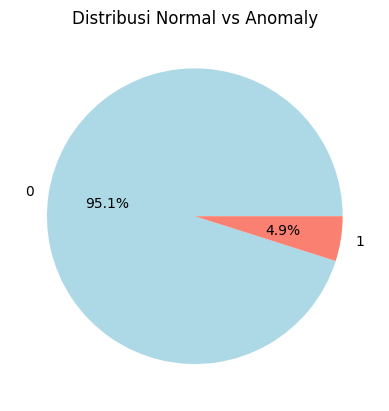

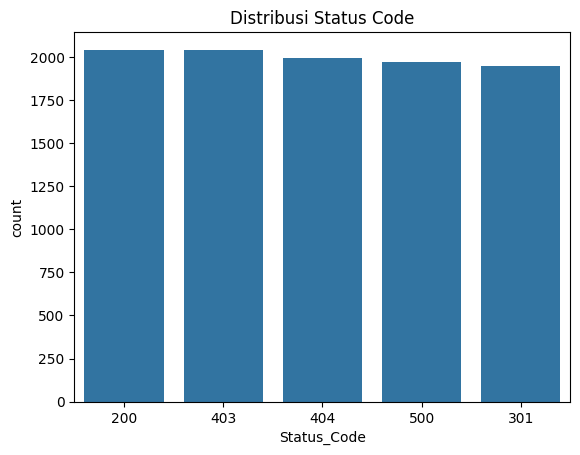

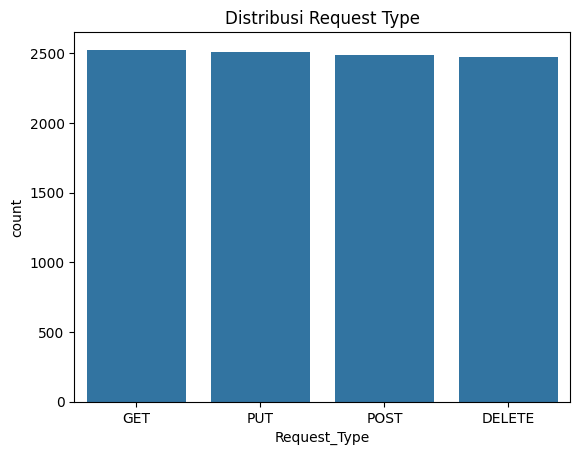

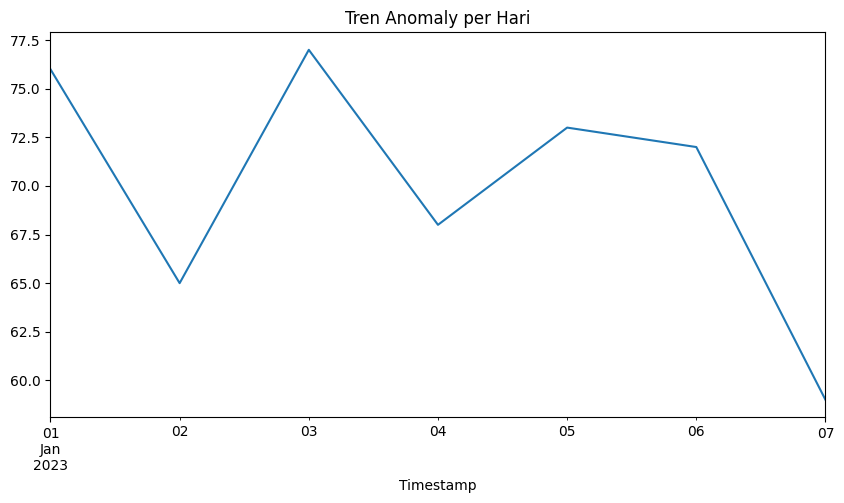

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# pie chart anomaly vs normal
df['Anomaly_Flag'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue','salmon'])
plt.title("Distribusi Normal vs Anomaly")
plt.ylabel("")
plt.show()

# bar chart status code
sns.countplot(data=df, x='Status_Code', order=df['Status_Code'].value_counts().index)
plt.title("Distribusi Status Code")
plt.show()

# bar chart request type
sns.countplot(data=df, x='Request_Type', order=df['Request_Type'].value_counts().index)
plt.title("Distribusi Request Type")
plt.show()

# tren anomaly berdasarkan waktu
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp').resample('D')['Anomaly_Flag'].sum().plot(figsize=(10,5))
plt.title("Tren Anomaly per Hari")
plt.show()

6. Anomaly Detection sederhana (Machine Learning).

Pakai Decision Tree untuk klasifikasi apakah suatu log itu anomaly (1) atau normal (0).

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# encode kolom kategori
df_encoded = pd.get_dummies(df.drop(columns=['Timestamp','IP_Address','Session_ID']))

# split data
X = df_encoded.drop(columns=['Anomaly_Flag'])
y = df_encoded['Anomaly_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# model decision tree
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# evaluasi
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2848
           1       1.00      0.03      0.05       152

    accuracy                           0.95      3000
   macro avg       0.98      0.51      0.51      3000
weighted avg       0.95      0.95      0.93      3000



#**Eksekusi Dataset Pakai (Decision Tree)**

             Timestamp      IP_Address Request_Type  Status_Code  \
0  2023-01-01 00:00:00  202.118.116.11          GET          403   
1  2023-01-01 00:01:00    38.30.40.178       DELETE          301   
2  2023-01-01 00:02:00    209.5.148.15         POST          500   
3  2023-01-01 00:03:00   211.116.60.71          GET          301   
4  2023-01-01 00:04:00  170.166.36.145         POST          404   

   Anomaly_Flag User_Agent  Session_ID Location  
0             0       Edge        4835   Brazil  
1             0        Bot        3176    China  
2             0      Opera        4312    China  
3             0        Bot        1003   France  
4             0    Firefox        1428  Germany  
Accuracy: 0.9506666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2848
           1       1.00      0.03      0.05       152

    accuracy                           0.95      3000
   macro avg       

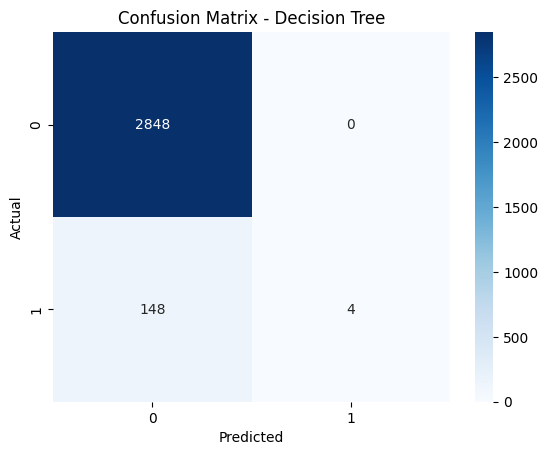

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/advanced_cybersecurity_data.csv")

print(df.head())

X = df.drop("Anomaly_Flag", axis=1)
y = df["Anomaly_Flag"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

#**Eksekusi Dataset Pakai (Random Forest)**

Random Forest Accuracy: 0.9506666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2848
           1       1.00      0.03      0.05       152

    accuracy                           0.95      3000
   macro avg       0.98      0.51      0.51      3000
weighted avg       0.95      0.95      0.93      3000



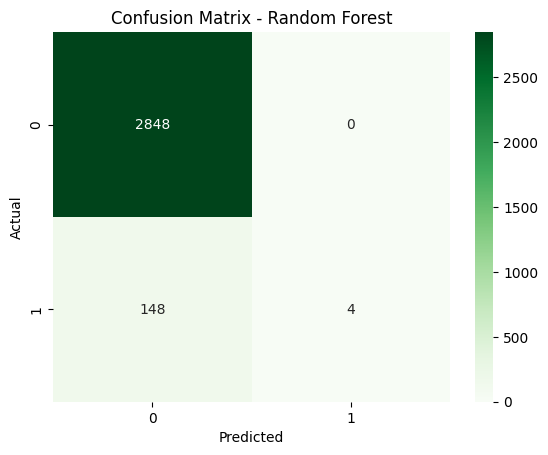

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# **Decision Tree VS Random Forest**

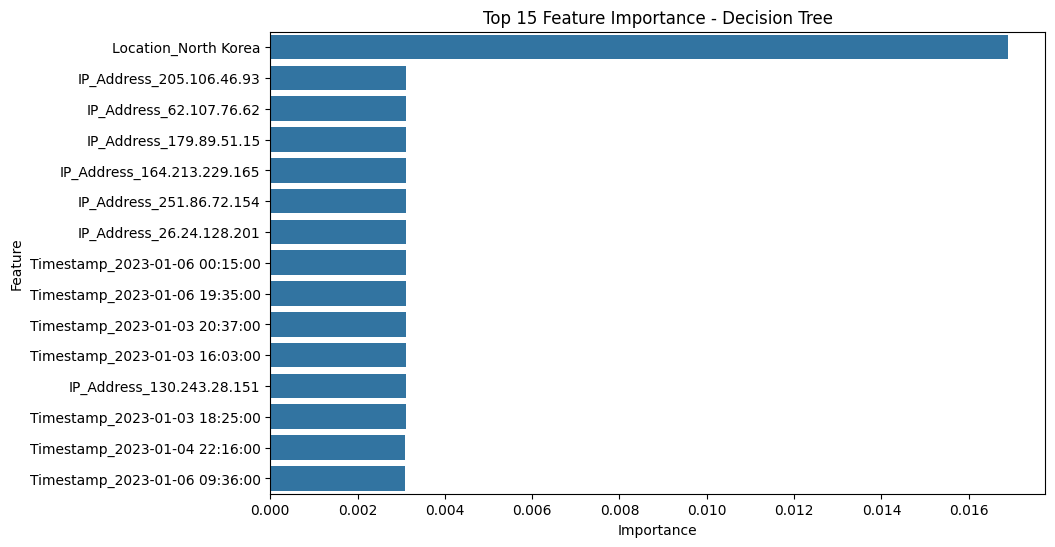

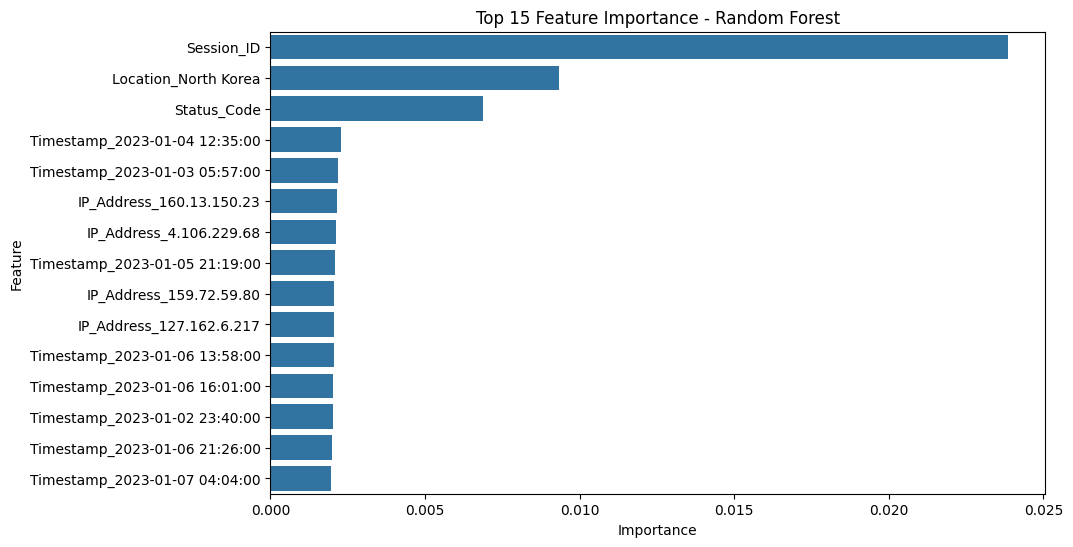

In [23]:
importances = clf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15))
plt.title("Top 15 Feature Importance - Decision Tree")
plt.show()

importances_rf = rf_clf.feature_importances_
feature_names = X.columns

feat_imp_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_rf.head(15))
plt.title("Top 15 Feature Importance - Random Forest")
plt.show()